## Métricas de viajes en Borough y Zonas para Green Taxi
#### Utilizando el dataset: ‘green_tripdata_2023-09.parquet’ 
Heidi 7/12/23
Siguiendo la sugerencia del repo NYC Taxis CO2” se validan las Ideas de análisis e implementación
* Viajes inter e intra boroughs
* Borough con mayor/menor cantidad de viajes
* Viajes entre distintas Zonas


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


Abir dataset de taxis green de NYC

In [4]:


# Especifica la ruta del archivo Parquet
ruta_archivo_parquet = 'Datasets\green_tripdata_2023-09.parquet' 

# Lee el archivo Parquet en un DataFrame de pandas
df_green_taxi_2023_09 = pd.read_parquet(ruta_archivo_parquet)

# Muestra las primeras filas del DataFrame
df_green_taxi_2023_09.head(20)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,N,1.0,41,75,1.0,1.10,7.9,1.00,1.5,0.00,0.00,NaN,1.0,10.40,1.0,1.0,0.00
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,N,1.0,74,236,1.0,1.80,10.7,3.75,1.5,3.15,0.00,NaN,1.0,19.10,1.0,1.0,2.75
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,N,5.0,93,205,2.0,10.52,60.0,0.00,0.0,0.00,0.00,NaN,1.0,61.00,1.0,2.0,0.00
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,N,1.0,112,17,1.0,4.72,23.3,1.00,0.5,10.00,0.00,NaN,1.0,35.80,1.0,1.0,0.00
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,N,1.0,131,82,1.0,5.95,24.0,1.00,0.5,0.00,0.00,NaN,1.0,26.50,2.0,1.0,0.00
5,2,2023-09-01 00:01:00,2023-09-01 00:01:05,N,5.0,255,255,2.0,0.16,60.0,0.00,0.0,0.10,0.00,NaN,1.0,61.10,1.0,2.0,0.00
6,2,2023-09-01 00:19:21,2023-09-01 00:49:56,N,1.0,92,239,1.0,12.93,54.1,1.00,0.5,16.57,6.94,NaN,1.0,82.86,1.0,1.0,2.75
7,2,2023-09-01 00:30:35,2023-09-01 00:58:30,N,5.0,93,107,2.0,12.95,50.0,0.00,0.0,10.75,0.00,NaN,1.0,64.50,1.0,2.0,2.75
8,1,2023-09-01 00:09:23,2023-09-01 00:44:12,N,5.0,93,163,1.0,9.80,80.0,0.00,0.0,0.00,0.00,NaN,0.0,80.00,1.0,2.0,0.00
9,1,2023-09-01 00:52:14,2023-09-01 01:14:31,N,1.0,93,236,1.0,13.00,49.9,3.75,1.5,12.40,6.94,NaN,1.0,74.49,1.0,1.0,2.75


In [5]:
df_green_taxi_2023_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65471 entries, 0 to 65470
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65471 non-null  int32         
 1   lpep_pickup_datetime   65471 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  65471 non-null  datetime64[ns]
 3   store_and_fwd_flag     60856 non-null  object        
 4   RatecodeID             60856 non-null  float64       
 5   PULocationID           65471 non-null  int32         
 6   DOLocationID           65471 non-null  int32         
 7   passenger_count        60856 non-null  float64       
 8   trip_distance          65471 non-null  float64       
 9   fare_amount            65471 non-null  float64       
 10  extra                  65471 non-null  float64       
 11  mta_tax                65471 non-null  float64       
 12  tip_amount             65471 non-null  float64       
 13  t

Selecciono las columnas a utilizar para responder a las metricas

In [7]:
df_green_taxi_2023_09_Borough = df_green_taxi_2023_09[['VendorID',	'lpep_pickup_datetime',	'lpep_dropoff_datetime','PULocationID','DOLocationID']]
df_green_taxi_2023_09_Borough

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,41,75
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,74,236
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,93,205
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,112,17
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,131,82
...,...,...,...,...,...
65466,2,2023-09-30 22:09:00,2023-09-30 22:21:00,17,35
65467,2,2023-09-30 22:06:00,2023-09-30 22:15:00,166,244
65468,2,2023-09-30 22:02:00,2023-09-30 22:38:00,166,132
65469,2,2023-09-30 23:22:00,2023-09-30 23:38:00,159,137


Abro el archivo de zonas y Borough

In [8]:
df_taxi_zone_lookup = pd.read_csv('Datasets\\taxi+_zone_lookup.csv')
df_taxi_zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Uno el dataset de green taxis con el de zonas y borough

In [10]:
import pandas as pd


# Merging para obtener información de partida
df_merged_green_taxi_Borough_Zona = pd.merge(df_green_taxi_2023_09_Borough, df_taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df_merged_green_taxi_Borough_Zona.rename(columns={'Borough': 'Partida_Borough', 'Zone': 'Partida_Zone'}, inplace=True)
df_merged_green_taxi_Borough_Zona.drop(columns=['LocationID', 'service_zone'], inplace=True)

# Merging para obtener información de destino
df_merged_green_taxi_Borough_Zona = pd.merge(df_merged_green_taxi_Borough_Zona, df_taxi_zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left')
df_merged_green_taxi_Borough_Zona.rename(columns={'Borough': 'Destino_Borough', 'Zone': 'Destino_Zone'}, inplace=True)
df_merged_green_taxi_Borough_Zona.drop(columns=['LocationID', 'service_zone'], inplace=True)

# Ahora df_merged tiene las nuevas columnas que necesitas


In [11]:
df_merged_green_taxi_Borough_Zona

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,41,75,Manhattan,Central Harlem,Manhattan,East Harlem South
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,74,236,Manhattan,East Harlem North,Manhattan,Upper East Side North
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,93,205,Queens,Flushing Meadows-Corona Park,Queens,Saint Albans
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,112,17,Brooklyn,Greenpoint,Brooklyn,Bedford
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,131,82,Queens,Jamaica Estates,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...
65466,2,2023-09-30 22:09:00,2023-09-30 22:21:00,17,35,Brooklyn,Bedford,Brooklyn,Brownsville
65467,2,2023-09-30 22:06:00,2023-09-30 22:15:00,166,244,Manhattan,Morningside Heights,Manhattan,Washington Heights South
65468,2,2023-09-30 22:02:00,2023-09-30 22:38:00,166,132,Manhattan,Morningside Heights,Queens,JFK Airport
65469,2,2023-09-30 23:22:00,2023-09-30 23:38:00,159,137,Bronx,Melrose South,Manhattan,Kips Bay


Creo la columna de viajes intra (dentro del mismo) o inter(vijes entre) boroughs

In [13]:
# Agregar una nueva columna 'Borough_Category' basada en la comparación de las columnas 'Partida_Borough' y 'Destino_Borough'
df_merged_green_taxi_Borough_Zona['Borough_Category'] = df_merged_green_taxi_Borough_Zona.apply(lambda row: 'Intra Borough' if row['Partida_Borough'] == row['Destino_Borough'] else 'Inter Borough', axis=1)


In [14]:
df_merged_green_taxi_Borough_Zona

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone,Borough_Category
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,41,75,Manhattan,Central Harlem,Manhattan,East Harlem South,Intra Borough
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,74,236,Manhattan,East Harlem North,Manhattan,Upper East Side North,Intra Borough
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,93,205,Queens,Flushing Meadows-Corona Park,Queens,Saint Albans,Intra Borough
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,112,17,Brooklyn,Greenpoint,Brooklyn,Bedford,Intra Borough
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,131,82,Queens,Jamaica Estates,Queens,Elmhurst,Intra Borough
...,...,...,...,...,...,...,...,...,...,...
65466,2,2023-09-30 22:09:00,2023-09-30 22:21:00,17,35,Brooklyn,Bedford,Brooklyn,Brownsville,Intra Borough
65467,2,2023-09-30 22:06:00,2023-09-30 22:15:00,166,244,Manhattan,Morningside Heights,Manhattan,Washington Heights South,Intra Borough
65468,2,2023-09-30 22:02:00,2023-09-30 22:38:00,166,132,Manhattan,Morningside Heights,Queens,JFK Airport,Inter Borough
65469,2,2023-09-30 23:22:00,2023-09-30 23:38:00,159,137,Bronx,Melrose South,Manhattan,Kips Bay,Inter Borough


## Viajes Inter e Intra Boroughs

In [20]:
# Contar la cantidad de viajes Intra e Inter Boroughs
green_intra_borough_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough'].shape[0]
green_inter_borough_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough'].shape[0]

print(f'Cantidad de viajes Intra Boroughs: {green_intra_borough_count}')
print(f'Cantidad de viajes Inter Boroughs: {green_inter_borough_count}')


Cantidad de viajes Intra Boroughs: 55236
Cantidad de viajes Inter Boroughs: 10235


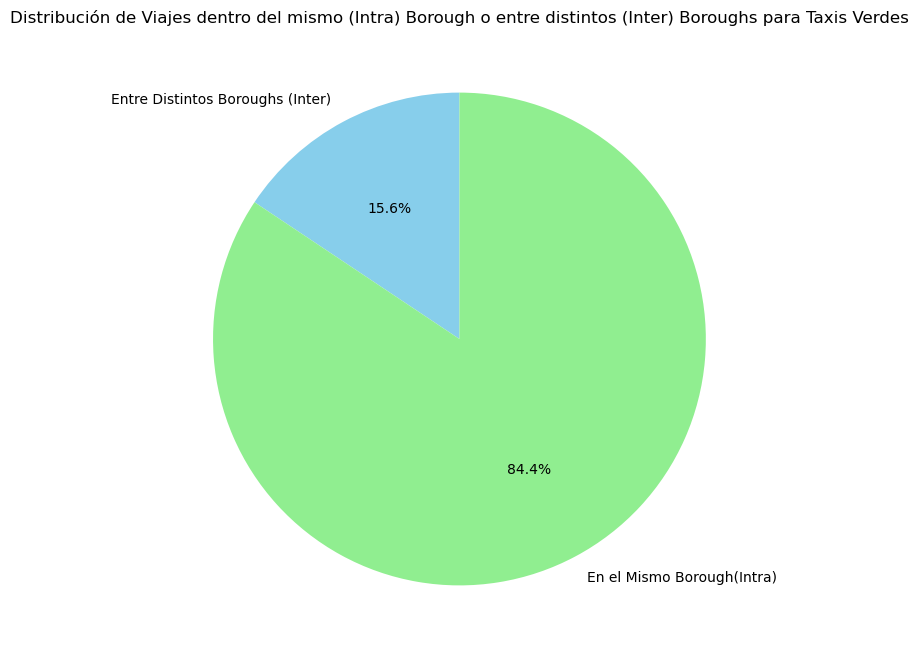

In [44]:
# Crear datos para el gráfico de torta
labels = ['Entre Distintos Boroughs (Inter)', 'En el Mismo Borough(Intra)']
sizes = [green_inter_borough_count, green_intra_borough_count]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribución de Viajes dentro del mismo (Intra) Borough o entre distintos (Inter) Boroughs para Taxis Verdes')

# Agregar fondo verde
#fig.patch.set_facecolor('green')

plt.show()

#### Distribución de Viajes dentro del mismo Borough


Para un mismo Borough, ¿cuál es el Borough con mayor cantidad de viajes y cuál menos?

In [28]:
# Filtrar solo los viajes Intra Borough
intra_borough_trips = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['Partida_Borough'].value_counts()

# Obtener el borough con mayor cantidad de viajes Intra Borough
borough_intra_max = intra_borough_trip_counts.idxmax()
cantidad_viajes_intra_max = intra_borough_trip_counts.max()

# Obtener el borough con menor cantidad de viajes Intra Borough
borough_intra_min = intra_borough_trip_counts.idxmin()
cantidad_viajes_intra_min = intra_borough_trip_counts.min()

print(f'Borough con mayor cantidad de viajes Intra Borough para green taxis: {borough_intra_max} ({cantidad_viajes_intra_max} viajes)')
print(f'Borough con menor cantidad de viajes Intra Borough para green taxis: {borough_intra_min} ({cantidad_viajes_intra_min} viajes)')


Borough con mayor cantidad de viajes Intra Borough para green taxis: Manhattan (32126 viajes)
Borough con menor cantidad de viajes Intra Borough para green taxis: EWR (1 viajes)


####  Cantidad de viajes Intra Borough por borough en un gráfico

Cantidad de Viajes Intra Boroughs por Borough (viaje dentro de un mismo Borough):

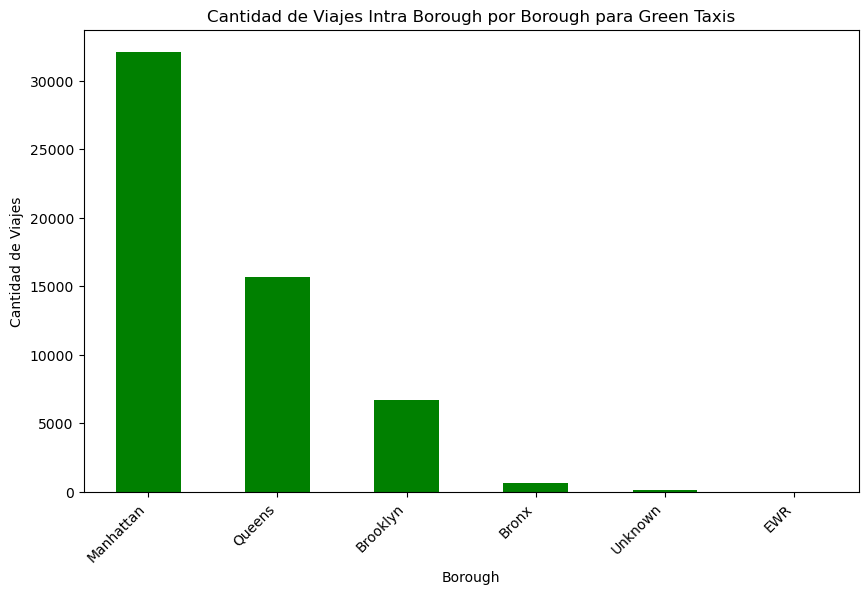

In [31]:


# Filtrar solo los viajes Intra Borough
intra_borough_trips = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['Partida_Borough'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
intra_borough_trip_counts.plot(kind='bar', color='green')
plt.title('Cantidad de Viajes Intra Borough por Borough para Green Taxis')
plt.xlabel('Borough')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')
plt.show()


#### "Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino"



In [33]:
# Filtrar solo los viajes Inter Borough
inter_borough_trips = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['Partida_Borough', 'Destino_Borough']).size().reset_index(name='Cantidad_Viajes')

# Ordenar el DataFrame inter_borough_counts de mayor a menor cantidad de viajes
inter_borough_counts_sorted = inter_borough_counts.sort_values(by='Cantidad_Viajes', ascending=False)

# Mostrar el resultado ordenado
print('Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor):')
print(inter_borough_counts_sorted)


Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor):
   Partida_Borough Destino_Borough  Cantidad_Viajes
20          Queens       Manhattan             2270
7         Brooklyn       Manhattan             1736
11       Manhattan           Bronx             1316
18          Queens        Brooklyn             1186
14       Manhattan          Queens             1123
8         Brooklyn          Queens              693
22          Queens         Unknown              470
2            Bronx       Manhattan              462
12       Manhattan        Brooklyn              273
16       Manhattan         Unknown              149
10        Brooklyn         Unknown              145
3            Bronx          Queens               88
17          Queens           Bronx               85
5         Brooklyn           Bronx               54
0            Bronx        Brooklyn               53
4            Bronx         Unknown               25
13       Manhattan

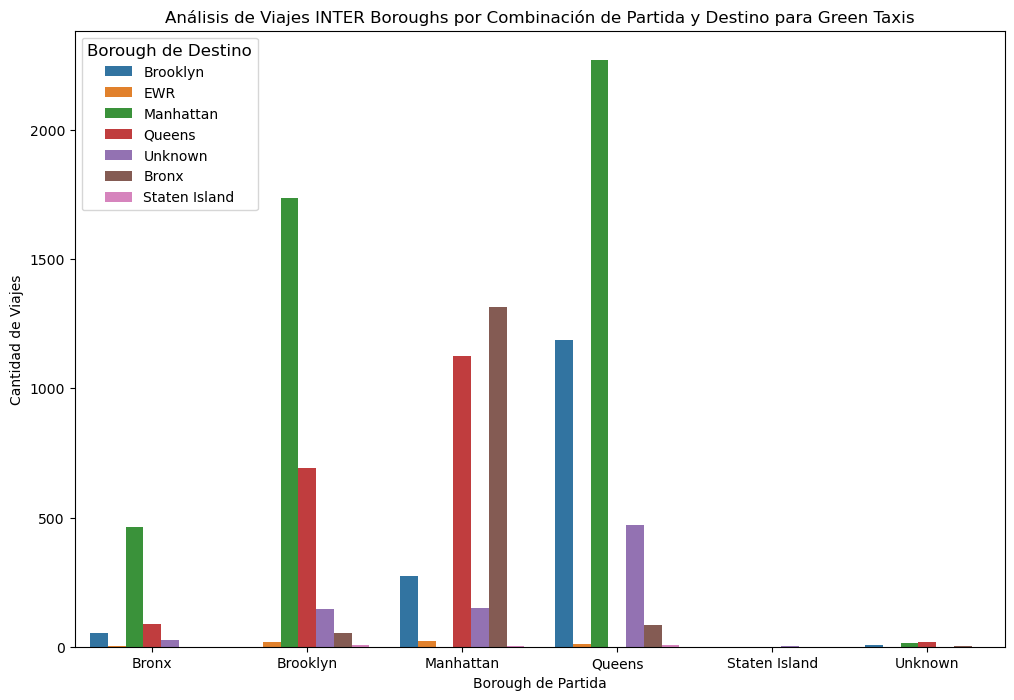

In [34]:


# Filtrar solo los viajes INTER Boroughs
inter_borough_trips = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['Partida_Borough', 'Destino_Borough']).size().reset_index(name='Cantidad_Viajes')

# Crear un gráfico de barras con colores distintos para cada combinación
plt.figure(figsize=(12, 8))
sns.barplot(x='Partida_Borough', y='Cantidad_Viajes', hue='Destino_Borough', data=inter_borough_counts)
plt.title('Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino para Green Taxis')
plt.xlabel('Borough de Partida')
plt.ylabel('Cantidad de Viajes')
plt.legend(title='Borough de Destino', title_fontsize='12')
plt.show()


Se puede ver que los viajes más frencuentes son de Queens a Manhattan (2270 viajes) y le sigue de Brooklyn a Manhattan (1736 viajes ).

## Viajes por zonas
Las zonas, son equivalentes a barrios dentro de los Borough

#### Cantidad de viajes entre distintas (INTER) zonas 

In [36]:
# Contar la cantidad de viajes entre distintas zonas
viajes_entre_zonas_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Partida_Zone'] != df_merged_green_taxi_Borough_Zona['Destino_Zone']].shape[0]

print(f'Cantidad de viajes entre distintas zonas: {viajes_entre_zonas_count}')


Cantidad de viajes entre distintas zonas: 57692


In [37]:
# Contar la cantidad de viajes entre distintas zonas
viajes_en_misma_zona_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Partida_Zone'] == df_merged_green_taxi_Borough_Zona['Destino_Zone']].shape[0]

print(f'Cantidad de viajes en la misma zona: {viajes_en_misma_zona_count}')


Cantidad de viajes en la misma zona: 7779


#### Cantidad de Viajes Intra Zona vs Inter Zona

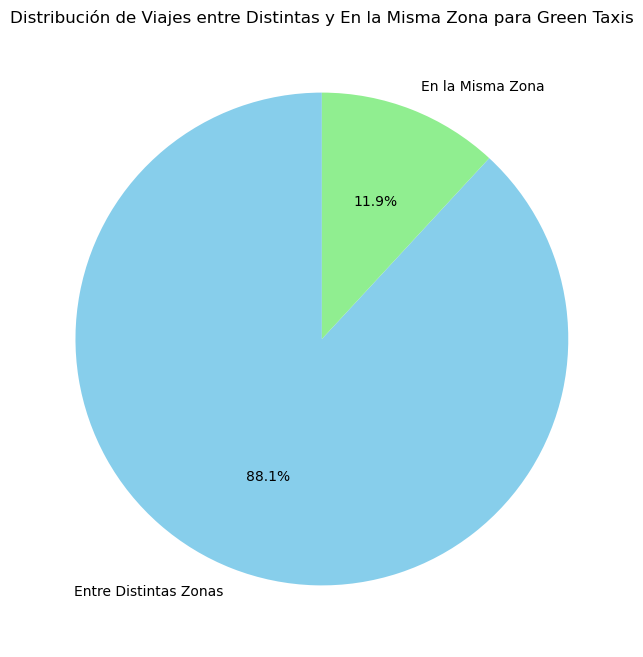

In [45]:
# Contar la cantidad de viajes entre distintas zonas y en la misma zona
viajes_entre_zonas_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Partida_Zone'] != df_merged_green_taxi_Borough_Zona['Destino_Zone']].shape[0]
viajes_en_misma_zona_count = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Partida_Zone'] == df_merged_green_taxi_Borough_Zona['Destino_Zone']].shape[0]

# Crear datos para el gráfico de torta
labels = ['Entre Distintas Zonas', 'En la Misma Zona']
sizes = [viajes_entre_zonas_count, viajes_en_misma_zona_count]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Viajes entre Distintas y En la Misma Zona para Green Taxis')
plt.show()

Son más frecuentes los viajes entre distintas zonas. 


#### Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden):

In [40]:

# Supongamos que df_merged es tu DataFrame original

# Filtrar solo los viajes entre distintas zonas
viajes_entre_zonas_counts = df_merged_green_taxi_Borough_Zona[df_merged_green_taxi_Borough_Zona['Partida_Zone'] != df_merged_green_taxi_Borough_Zona['Destino_Zone']]

# Crear una nueva columna con combinaciones ordenadas alfabéticamente
viajes_entre_zonas_counts['Combinacion_Zonas'] = viajes_entre_zonas_counts.apply(lambda row: '-'.join(sorted([str(row['Partida_Zone']), str(row['Destino_Zone'])])), axis=1)

# Contar la cantidad de viajes para cada combinación de zonas
viajes_entre_zonas_counts_aggregated = viajes_entre_zonas_counts.groupby('Combinacion_Zonas').size().reset_index(name='Cantidad_Viajes')

# Ordenar el DataFrame por la cantidad de viajes de mayor a menor
viajes_entre_zonas_counts_aggregated_sorted = viajes_entre_zonas_counts_aggregated.sort_values(by='Cantidad_Viajes', ascending=False)

# Mostrar el resultado
print('Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden) para Green Taxis:')
viajes_entre_zonas_counts_aggregated_sorted.head()

Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden) para Green Taxis:


C:\Users\Heidi\AppData\Local\Temp\ipykernel_10272\47661589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_entre_zonas_counts['Combinacion_Zonas'] = viajes_entre_zonas_counts.apply(lambda row: '-'.join(sorted([str(row['Partida_Zone']), str(row['Destino_Zone'])])), axis=1)


,Combinacion_Zonas,Cantidad_Viajes
2465,East Harlem North-East Harlem South,3299
2558,East Harlem North-Upper East Side North,1350
1339,Central Harlem-East Harlem North,1206
2517,East Harlem North-Morningside Heights,1103
1231,Central Harlem North-East Harlem North,740


In [42]:
viajes_entre_zonas_counts_aggregated_sorted.to_csv('viajes entre distintas zonas.csv')
Veinte_Inter_Zonas_con_mas_viajes = viajes_entre_zonas_counts_aggregated_sorted.head(20)
Veinte_Inter_Zonas_con_mas_viajes

,Combinacion_Zonas,Cantidad_Viajes
2465,East Harlem North-East Harlem South,3299
2558,East Harlem North-Upper East Side North,1350
1339,Central Harlem-East Harlem North,1206
2517,East Harlem North-Morningside Heights,1103
1231,Central Harlem North-East Harlem North,740
2560,East Harlem North-Upper West Side North,690
2578,East Harlem North-Yorkville West,657
1321,Central Harlem-Central Harlem North,613
2948,Elmhurst-LaGuardia Airport,601
2691,East Harlem South-Upper East Side North,554


#### Grafico Veinte Combinaciones de Zonas con más Viajes para Green Taxis

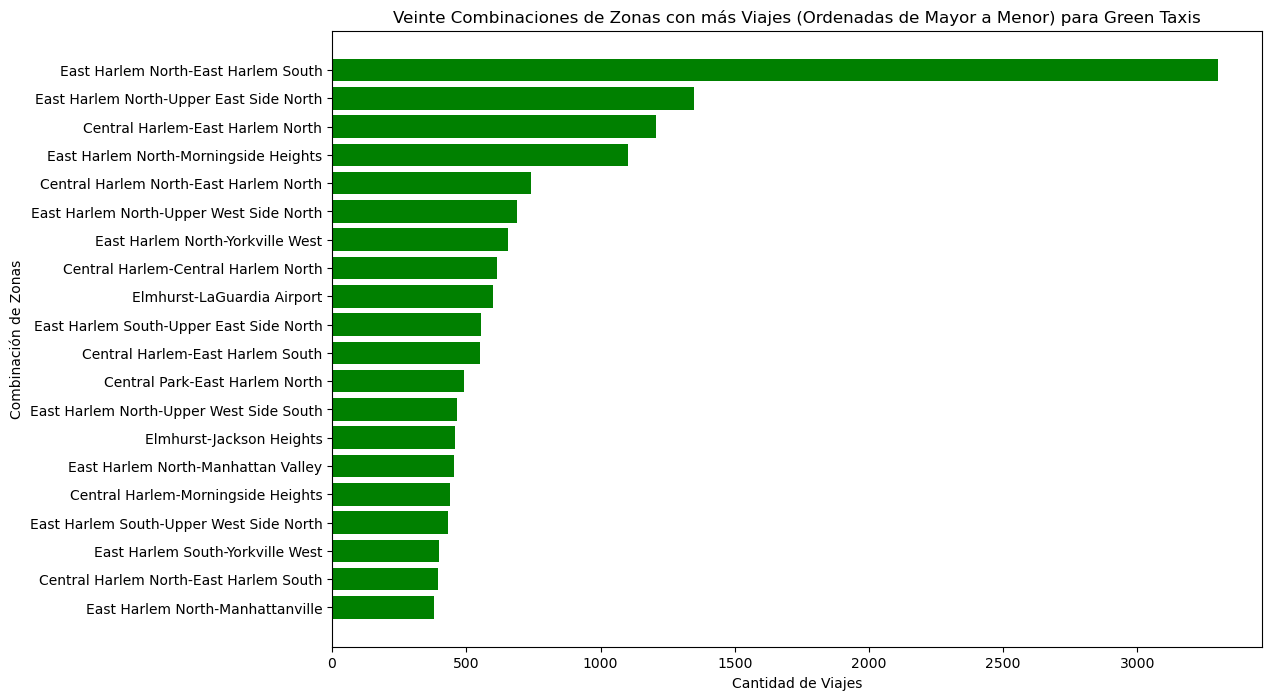

In [46]:
# Ordenar el DataFrame de mayor a menor por la columna 'Cantidad_Viajes'
Veinte_Inter_Zonas_con_mas_viajes_sorted = Veinte_Inter_Zonas_con_mas_viajes.sort_values(by='Cantidad_Viajes', ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(Veinte_Inter_Zonas_con_mas_viajes_sorted['Combinacion_Zonas'], Veinte_Inter_Zonas_con_mas_viajes_sorted['Cantidad_Viajes'], color='green')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Combinación de Zonas')
plt.title('Veinte Combinaciones de Zonas con más Viajes (Ordenadas de Mayor a Menor) para Green Taxis')
plt.show()

La ruta más frecuente entre zonas ees: Upper East Side North-Upper East Side South con	37254 viajes. Le sigue Midtown Center-Upper East Side South con	17183 viajes.

In [47]:
Veinte_Inter_Zonas_con_mas_viajes.to_csv('20 Inter Zonas con mas viajes indiferente del orden Partida Destino Green Taxis.csv')


## Relacionar días y horarios de la semana con combinaciones de zonas de viaje

In [51]:
# Convertir las columnas de fecha y hora al formato datetime
df_merged_green_taxi_Borough_Zona['lpep_pickup_datetime'] = pd.to_datetime(df_merged_green_taxi_Borough_Zona['lpep_pickup_datetime'])
df_merged_green_taxi_Borough_Zona['lpep_dropoff_datetime'] = pd.to_datetime(df_merged_green_taxi_Borough_Zona['lpep_dropoff_datetime'])

# Agregar columnas para el día de la semana y la hora del día
df_merged_green_taxi_Borough_Zona['day_of_week'] = df_merged_green_taxi_Borough_Zona['lpep_pickup_datetime'].dt.day_name()
df_merged_green_taxi_Borough_Zona['hour_of_day'] = df_merged_green_taxi_Borough_Zona['lpep_pickup_datetime'].dt.hour

In [52]:
df_merged_green_taxi_Borough_Zona

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone,Borough_Category,day_of_week,hour_of_day
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,41,75,Manhattan,Central Harlem,Manhattan,East Harlem South,Intra Borough,Friday,0
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,74,236,Manhattan,East Harlem North,Manhattan,Upper East Side North,Intra Borough,Friday,0
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,93,205,Queens,Flushing Meadows-Corona Park,Queens,Saint Albans,Intra Borough,Friday,0
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,112,17,Brooklyn,Greenpoint,Brooklyn,Bedford,Intra Borough,Friday,0
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,131,82,Queens,Jamaica Estates,Queens,Elmhurst,Intra Borough,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65466,2,2023-09-30 22:09:00,2023-09-30 22:21:00,17,35,Brooklyn,Bedford,Brooklyn,Brownsville,Intra Borough,Saturday,22
65467,2,2023-09-30 22:06:00,2023-09-30 22:15:00,166,244,Manhattan,Morningside Heights,Manhattan,Washington Heights South,Intra Borough,Saturday,22
65468,2,2023-09-30 22:02:00,2023-09-30 22:38:00,166,132,Manhattan,Morningside Heights,Queens,JFK Airport,Inter Borough,Saturday,22
65469,2,2023-09-30 23:22:00,2023-09-30 23:38:00,159,137,Bronx,Melrose South,Manhattan,Kips Bay,Inter Borough,Saturday,23


In [54]:
# Agrupar por día de la semana, hora del día y combinaciones de zonas de viaje
green_taxis_dia_horas_zonas = df_merged_green_taxi_Borough_Zona.groupby(['day_of_week', 'hour_of_day', 'Partida_Zone', 'Destino_Zone']).size().reset_index(name='count')
green_taxis_dia_horas_zonas = green_taxis_dia_horas_zonas.sort_values(by='count', ascending=False)

# Mostrar el resultado
green_taxis_dia_horas_zonas

,day_of_week,hour_of_day,Partida_Zone,Destino_Zone,count
28137,Tuesday,7,East Harlem North,East Harlem South,73
695,Friday,7,East Harlem North,East Harlem South,66
33440,Wednesday,7,East Harlem North,East Harlem South,60
22524,Thursday,7,East Harlem North,East Harlem South,58
28371,Tuesday,8,East Harlem North,East Harlem South,56
...,...,...,...,...,...
18816,Sunday,10,Jamaica,Baisley Park,1
18815,Sunday,10,Jackson Heights,Ridgewood,1
18814,Sunday,10,Jackson Heights,Park Slope,1
18813,Sunday,10,Jackson Heights,North Corona,1


2. Promedio de viajes por hora del día:

In [56]:
promedio_viajes_por_hora_green_taxi = green_taxis_dia_horas_zonas.groupby('hour_of_day').size().reset_index(name='num_viajes')
promedio_viajes_por_hora_green_taxi['promedio_viajes'] = promedio_viajes_por_hora_green_taxi['num_viajes'] / len(green_taxis_dia_horas_zonas['day_of_week'].unique())

 #Ordenar el DataFrame por la columna 'promedio_viajes' de mayor a menor
promedio_viajes_por_hora_green_taxi = promedio_viajes_por_hora_green_taxi.sort_values(by='promedio_viajes', ascending=False)
promedio_viajes_por_hora_green_taxi


,hour_of_day,num_viajes,promedio_viajes
17,17,2529,361.285714
18,18,2409,344.142857
16,16,2375,339.285714
15,15,2325,332.142857
14,14,2288,326.857143
12,12,2217,316.714286
19,19,2203,314.714286
13,13,2163,309.000000
11,11,2083,297.571429
10,10,2038,291.142857


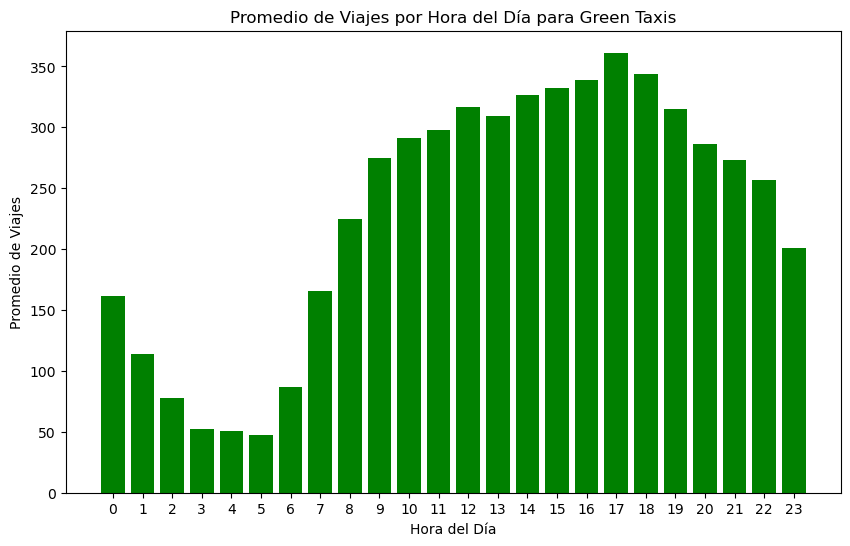

In [58]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_viajes_por_hora_green_taxi['hour_of_day'], promedio_viajes_por_hora_green_taxi['promedio_viajes'], color='green')
plt.title('Promedio de Viajes por Hora del Día para Green Taxis')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Viajes')
plt.xticks(promedio_viajes_por_hora_green_taxi['hour_of_day'])
plt.show()

In [61]:
demanda_por_dia_hora_green_taxi = df_merged_green_taxi_Borough_Zona.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='num_viajes')
demanda_por_dia_hora_green_taxi


,day_of_week,hour_of_day,num_viajes
0,Friday,0,229
1,Friday,1,164
2,Friday,2,83
3,Friday,3,57
4,Friday,4,56
...,...,...,...
163,Wednesday,19,545
164,Wednesday,20,428
165,Wednesday,21,400
166,Wednesday,22,378


### Demanda por día y hora de la semana:

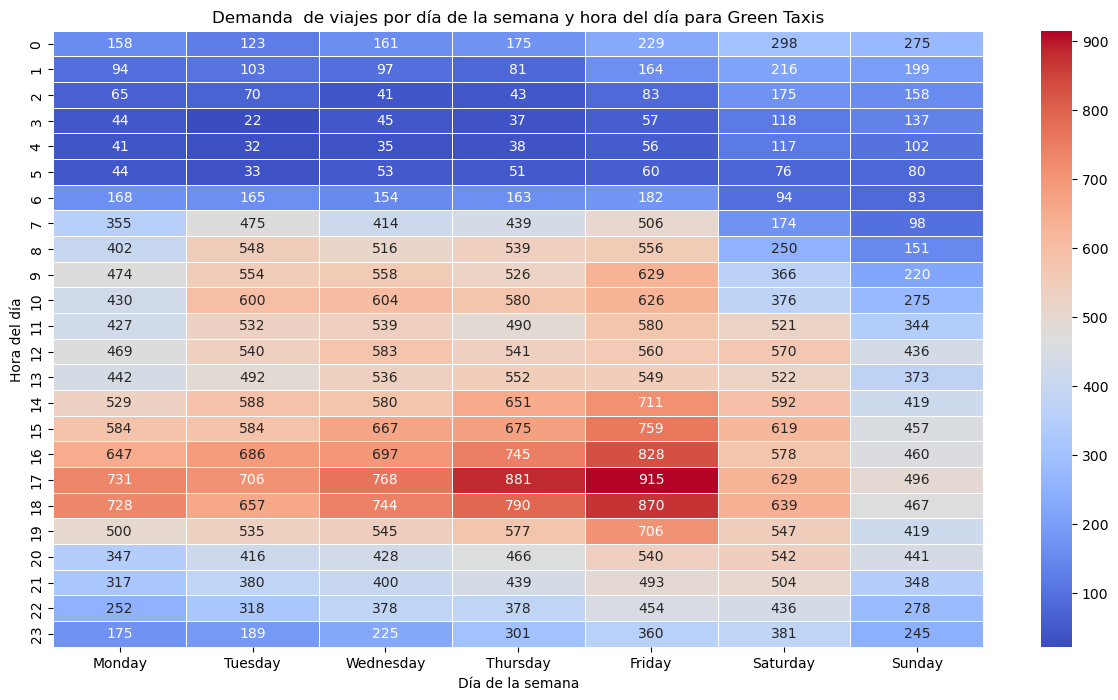

In [79]:
# Ordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
demanda_por_dia_hora_green_taxi['day_of_week'] = pd.Categorical(demanda_por_dia_hora_green_taxi['day_of_week'], categories=ordered_days, ordered=True)

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Crear un gráfico de barras
heatmap_data = demanda_por_dia_hora_green_taxi.pivot_table(index='hour_of_day', columns='day_of_week', values='num_viajes', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Configurar etiquetas y título
plt.title('Demanda  de viajes por día de la semana y hora del día para Green Taxis')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')

# Mostrar el gráfico
plt.show()


### Crear una función en Python que tome como parámetros el día actual, el rango horario, la zona de partida y la zona de destino, y devuelva el día y la hora recomendados para viajar donde hay menos cantidad de viajes. 

     # Obtener la fecha y hora actuales


In [72]:

def obtener_dia_actual():
    # Obtener la fecha y hora actuales
    ahora = datetime.now()

    # Obtener el nombre del día de la semana
    dia_actual = ahora.strftime('%A')

    return dia_actual

In [71]:
def sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, green_taxis_dia_horas_zonas):
    # Filtrar por rango horario, zona de partida y destino
    filtro_rango_horario = (green_taxis_dia_horas_zonas['hour_of_day'].between(rango_horario[0], rango_horario[1]))
    filtro_partida = (green_taxis_dia_horas_zonas['Partida_Zone'] == zona_partida)
    filtro_destino = (green_taxis_dia_horas_zonas['Destino_Zone'] == zona_destino)

    viajes_filtrados = green_taxis_dia_horas_zonas[filtro_rango_horario & filtro_partida & filtro_destino]

    # Agrupar por día de la semana y rango horario, contar la cantidad de viajes y ordenar de menor a mayor
    viajes_por_dia_y_horario = viajes_filtrados.groupby(['day_of_week', 'hour_of_day']).size().sort_values()

    # Obtener la primera y segunda alternativa
    primera_alternativa = viajes_por_dia_y_horario.idxmin()
    viajes_por_dia_y_horario = viajes_por_dia_y_horario.drop(primera_alternativa)
    segunda_alternativa = viajes_por_dia_y_horario.idxmin()

    return primera_alternativa, segunda_alternativa

# Ejemplo de uso
rango_horario = (6, 12)
zona_partida = 'Upper East Side South'
zona_destino = 'Upper East Side North'
resultado = sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, green_taxis_dia_horas_zonas)
print("Primera alternativa:", resultado[0])
print("Segunda alternativa:", resultado[1])

ValueError: attempt to get argmin of an empty sequence

In [72]:
def sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, grouped_data):
    # Filtrar por rango horario, zona de partida y destino
    filtro_rango_horario = (grouped_data['hour_of_day'].between(rango_horario[0], rango_horario[1]))
    filtro_partida = (grouped_data['Partida_Zone'] == zona_partida)
    filtro_destino = (grouped_data['Destino_Zone'] == zona_destino)

    viajes_filtrados = grouped_data[filtro_rango_horario & filtro_partida & filtro_destino]

    # Agrupar por día de la semana y rango horario, contar la cantidad de viajes y ordenar de menor a mayor
    viajes_por_dia_y_horario = viajes_filtrados.groupby(['day_of_week', 'hour_of_day']).size().sort_values()

    # Obtener la primera y segunda alternativa
    primera_alternativa = viajes_por_dia_y_horario.idxmin()
    viajes_por_dia_y_horario = viajes_por_dia_y_horario.drop(primera_alternativa)
    segunda_alternativa = viajes_por_dia_y_horario.idxmin()

    return primera_alternativa, segunda_alternativa

# Ejemplo de uso
rango_horario = (6, 12)
zona_partida = 'Upper East Side South'
zona_destino = 'Upper East Side North'
resultado = sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, green_taxis_dia_horas_zonas)

# Presentar resultados de forma más estética
print("Mejor momento para viajar:")
print(f"Primera alternativa: Día {resultado[0][0]},a las {resultado[0][1]} Horas")
print(f"Segunda alternativa: Día {resultado[1][0]}, a las {resultado[1][1]} Hora")


Mejor momento para viajar:
Primera alternativa: Día Friday,a las 6 Horas
Segunda alternativa: Día Sunday, a las 11 Hora
